In [96]:
import pandas as pd
import numpy as np
import urllib.request
import matplotlib.pylab as plt
import sklearn.cluster
kelly_colors_hex = [
    '#FFB300', # Vivid Yellow
    '#803E75', # Strong Purple
    '#FF6800', # Vivid Orange
    '#A6BDD7', # Very Light Blue
    '#C10020', # Vivid Red
    '#CEA262', # Grayish Yellow
    '#817066', # Medium Gray
    '#007D34', # Vivid Green
    '#F6768E', # Strong Purplish Pink
    '#00538A', # Strong Blue
    '#FF7A5C', # Strong Yellowish Pink
    '#53377A', # Strong Violet
    '#FF8E00', # Vivid Orange Yellow
    '#B32851', # Strong Purplish Red
    '#F4C800', # Vivid Greenish Yellow
    '#7F180D', # Strong Reddish Brown
    '#93AA00', # Vivid Yellowish Green
    '#593315', # Deep Yellowish Brown
    '#F13A13', # Vivid Reddish Orange
    '#232C16', # Dark Olive Green
 ]
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['clf', 'plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [24]:
urllib.request.urlretrieve("https://data.cityofnewyork.us/api/views/hg8x-zxpr/rows.csv?accessType=DOWNLOAD","housing.csv")

('housing.csv', <http.client.HTTPMessage at 0x7fc5540de128>)

In [35]:
housing = pd.read_csv("housing.csv")

In [42]:
housing.head()

,Project ID,Project Name,Project Start Date,Project Completion Date,Building ID,Number,Street,Borough,Postcode,BBL,...,2-BR Units,3-BR Units,4-BR Units,5-BR Units,6-BR+ Units,Unknown-BR Units,Counted Rental Units,Counted Homeownership Units,All Counted Units,Total Units
0,67358,CONFIDENTIAL,06/29/2018,NaN,NaN,----,----,Queens,NaN,NaN,...,0,2,0,0,0,0,0,2,2,2
1,67359,CONFIDENTIAL,06/29/2018,NaN,NaN,----,----,Queens,NaN,NaN,...,0,2,0,0,0,0,0,2,2,2
2,67362,CONFIDENTIAL,06/29/2018,NaN,NaN,----,----,Staten Island,NaN,NaN,...,1,0,0,0,0,0,0,1,1,1
3,67365,CONFIDENTIAL,06/29/2018,NaN,NaN,----,----,Brooklyn,NaN,NaN,...,4,0,0,0,0,0,0,4,4,4
4,67373,CONFIDENTIAL,06/29/2018,NaN,NaN,----,----,Brooklyn,NaN,NaN,...,0,0,0,0,0,2,0,2,2,2


In [40]:
len(housing)

3396

In [43]:
housing.columns

Index(['Project ID', 'Project Name', 'Project Start Date',
       'Project Completion Date', 'Building ID', 'Number', 'Street', 'Borough',
       'Postcode', 'BBL', 'BIN', 'Community Board', 'Council District',
       'Census Tract', 'NTA - Neighborhood Tabulation Area', 'Latitude',
       'Longitude', 'Latitude (Internal)', 'Longitude (Internal)',
       'Building Completion Date', 'Reporting Construction Type',
       'Extended Affordability Only', 'Prevailing Wage Status',
       'Extremely Low Income Units', 'Very Low Income Units',
       'Low Income Units', 'Moderate Income Units', 'Middle Income Units',
       'Other Income Units', 'Studio Units', '1-BR Units', '2-BR Units',
       '3-BR Units', '4-BR Units', '5-BR Units', '6-BR+ Units',
       'Unknown-BR Units', 'Counted Rental Units',
       'Counted Homeownership Units', 'All Counted Units', 'Total Units'],
      dtype='object')

In [44]:
housing_filtered = housing.dropna(subset=['BBL'])

In [46]:
len(housing_filtered)

2534

In [47]:
housing_filtered = housing_filtered[['Postcode', 'BBL', 'BIN','Extremely Low Income Units', 'Very Low Income Units',
       'Low Income Units', 'Moderate Income Units', 'Middle Income Units',
       'Other Income Units','Total Units']]

In [48]:
housing_filtered.head()

,Postcode,BBL,BIN,Extremely Low Income Units,Very Low Income Units,Low Income Units,Moderate Income Units,Middle Income Units,Other Income Units,Total Units
14,10029.0,1.016120e+09,1051514.0,0,46,13,0,0,0,59
15,10029.0,1.016120e+09,1051514.0,0,49,10,0,0,0,59
16,10029.0,1.016120e+09,1051514.0,0,146,18,0,0,0,164
17,10029.0,1.016120e+09,1051514.0,0,147,17,0,0,0,164
18,10029.0,1.017080e+09,1079384.0,0,0,8,0,0,0,8


In [49]:
housing_filtered_aggregated = housing_filtered.groupby('BBL').sum()

In [51]:
housing_filtered_aggregated.shape

(2108, 9)

In [61]:
housing_filtered_aggregated['fraction'] = ((housing_filtered_aggregated['Extremely Low Income Units']+\
                                           housing_filtered_aggregated['Very Low Income Units']+\
                                          housing_filtered_aggregated['Low Income Units'])/housing_filtered_aggregated['Total Units'])*100

In [62]:
housing_filtered_aggregated.head()

,Postcode,BIN,Extremely Low Income Units,Very Low Income Units,Low Income Units,Moderate Income Units,Middle Income Units,Other Income Units,Total Units,fraction
BBL,,,,,,,,,,
0.000000e+00,11249.0,3425618.0,0,0,15,0,0,0,75,20.000000
1.000760e+09,10038.0,1090416.0,0,0,24,0,0,0,120,20.000000
1.000780e+09,10038.0,NaN,0,0,97,0,0,0,483,20.082816
1.002468e+09,10002.0,1084530.0,0,0,0,39,89,1,256,0.000000
1.002470e+09,20004.0,2155179.0,373,61,41,11,4,0,490,96.938776


In [74]:
housing_filtered_aggregated['BBL'] = housing_filtered_aggregated.index

In [63]:
housing_filtered_aggregated.to_csv("income_units.csv")

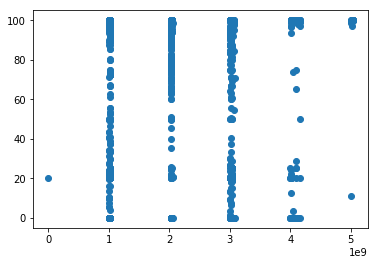

In [64]:
plt.plot(housing_filtered_aggregated.index,housing_filtered_aggregated['fraction'],'o')

Text(0,0.5,'Number of BBLs with the fraction')

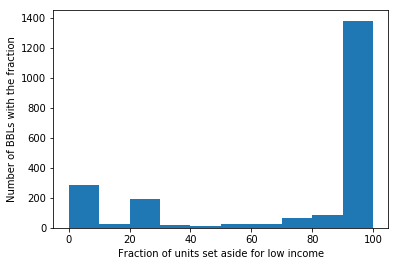

In [119]:
plt.hist(housing_filtered_aggregated['fraction'])
plt.xlabel("Fraction of units set aside for low income")
plt.ylabel("Number of BBLs with the fraction")

In [75]:
fraction_count = housing_filtered_aggregated.groupby('fraction').count()

In [78]:
fraction_count = fraction_count[['BBL']]
fraction_count['fraction'] = fraction_count.index

In [79]:
fraction_count.head()

,BBL,fraction
fraction,,
0.000000,272,0.000000
1.315789,1,1.315789
3.614458,1,3.614458
3.703704,1,3.703704
4.000000,1,4.000000


In [84]:
labels = {}
clf = sklearn.cluster.KMeans(n_clusters=3)
labels[3] = clf.fit_predict(fraction_count) #.reshape(100,2)
vs[3] = (np.sum([np.std(np.array(
[fraction_count[:,0][labels[3]==l], fraction_count[:,1][labels[3]==l]]).T - clf.cluster_centers_[l]) for l in labels[n_c]]))

NameError: name 'n_c' is not defined

In [87]:
kmeans = sklearn.cluster.KMeans(n_clusters=3, random_state=0).fit(fraction_count)

In [88]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [99]:
fraction_count['label'] = kmeans.labels_

In [100]:
fraction_count

,BBL,fraction,label
fraction,,,
0.000000,272,0.000000,2
1.315789,1,1.315789,2
3.614458,1,3.614458,2
3.703704,1,3.703704,2
4.000000,1,4.000000,2
5.714286,2,5.714286,2
6.590909,1,6.590909,2
7.317073,1,7.317073,2
7.692308,1,7.692308,2


In [112]:
fraction_count_0 = fraction_count[fraction_count.label == 0]
fraction_count_1 = fraction_count[fraction_count.label == 1]
fraction_count_2 = fraction_count[fraction_count.label == 2]

Text(0,0.5,"Number of BBL's with the fraction of income set")

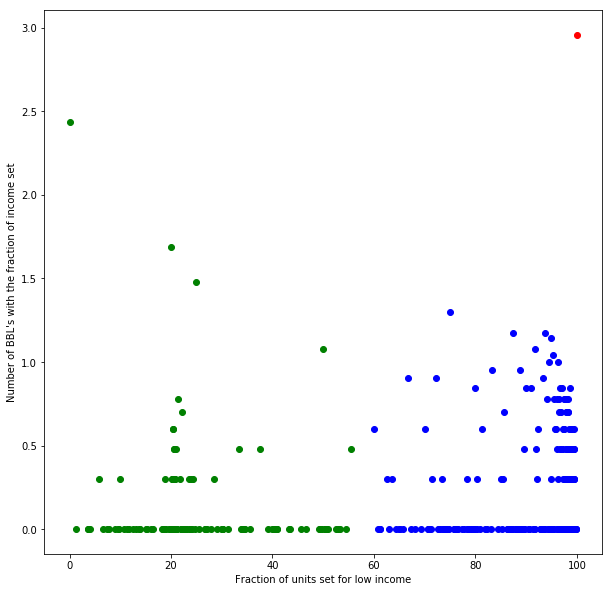

In [118]:
plt.figure(figsize=(10,10))
plt.plot(fraction_count_0['fraction'],np.log10(fraction_count_0['BBL']),'o',c='b')
plt.plot(fraction_count_1['fraction'],np.log10(fraction_count_1['BBL']),'o',c='r')
plt.plot(fraction_count_2['fraction'],np.log10(fraction_count_2['BBL']),'o',c='g')
plt.xlabel("Fraction of units set for low income")
plt.ylabel("Number of BBL's with the fraction of income set")

In [115]:
fraction_count_0

,BBL,fraction,label
fraction,,,
60.000000,4,60.000000,0
60.869565,1,60.869565,0
61.111111,1,61.111111,0
61.290323,1,61.290323,0
62.500000,2,62.500000,0
63.000000,1,63.000000,0
63.636364,2,63.636364,0
64.285714,1,64.285714,0
65.000000,1,65.000000,0
